In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.models import Model
from tensorflow.keras.regularizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.losses import *
from keras.utils import to_categorical
from keras.utils import plot_model
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error
import time

In [ ]:
def plot_results(history):
  fig, ax = plt.subplots(ncols=2, figsize=(12,4))
  ax[0].plot(history.history['accuracy'],label = 'train')
  ax[0].plot(history.history['val_accuracy'],label = 'test')
  ax[0].set_title('Accuracy')
  ax[0].legend(loc='lower right')
  ax[1].plot(history.history['loss'],label = 'train')
  ax[1].plot(history.history['val_loss'],label = 'test')
  ax[1].set_title('Loss')
  ax[1].legend(loc='upper right')
  plt.show()

def print_best_metrics(h):
  labels = ['training accuracy', 'validation accuracy', 'training loss', 'validation loss']
  keys = ['accuracy', 'val_accuracy', 'loss', 'val_loss']
  prefix = ['highest','lowest']
  for i in range(4):
    metric = np.array(h[keys[i]])
    am = np.argmax((1.5-i)*metric)
    print(f'The {prefix[i//2]} {labels[i]} was {metric[am]:.4f} obtained in epoch {am+1}')
    print(f'The final {labels[i]} was {metric[-1]:.4f}')

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


 After uploading the kaggle.json file, need to do the following steps

In [ ]:
! kaggle datasets download BengaliAI/numta/
! unzip numta.zip

Streaming output truncated to the last 5000 lines.
  inflating: training-e/e11778.png   
  inflating: training-e/e11779.png   
  inflating: training-e/e11780.png   
  inflating: training-e/e11781.png   
  inflating: training-e/e11782.png   
  inflating: training-e/e11783.png   
  inflating: training-e/e11784.png   
  inflating: training-e/e11785.png   
  inflating: training-e/e11786.png   
  inflating: training-e/e11787.png   
  inflating: training-e/e11788.png   
  inflating: training-e/e11789.png   
  inflating: training-e/e11790.png   
  inflating: training-e/e11791.png   
  inflating: training-e/e11792.png   
  inflating: training-e/e11793.png   
  inflating: training-e/e11794.png   
  inflating: training-e/e11795.png   
  inflating: training-e/e11796.png   
  inflating: training-e/e11797.png   
  inflating: training-e/e11798.png   
  inflating: training-e/e11799.png   
  inflating: training-e/e11800.png   
  inflating: training-e/e11801.png   
  inflating: training-e/e11802.png   

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
import os
import glob
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Set the path to the directory where your dataset is located
dataset_dir = '/content/'

# List the files in the dataset directory
dataset_files = os.listdir(dataset_dir)

# Check the files in the directory
print(dataset_files)

# Assuming you have a CSV file (you may need to adjust this for other formats)
#if 'training-a.csv' in dataset_files:
    # Load the dataset
    #data = pd.read_csv(os.path.join(dataset_dir, 'training-a.csv'))

    # Split the data into features and target (X and y)
    #X = data.drop(columns=['original filename', 'scanid', 'database name original', 'contributing team', 'database name'])
    #y = data['target_column']

    # Split the data into training and testing sets
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


['.config', 'training-d.csv', 'testing-e', 'training-e', 'training-a', 'training-e.csv', 'testing-b', 'testing-c', 'kaggle.json', 'testing-augc', 'training-a.csv', 'testing-auga', 'numta.zip', 'training-c', 'training-c.csv', 'testing-all-corrected', 'testing-d', 'training-b.csv', 'training-b', 'training-d', 'testing-a', 'testing-f', 'sample_data']


In [ ]:
#Declaring constants
FIG_WIDTH=20 # Width of figure
HEIGHT_PER_ROW=3 # Height of each row when showing a figure which consists of multiple rows
RESIZE_DIM=32 # The images will be resized to 32x32 pixels

In [ ]:
data_dir = dataset_dir
paths_train_a = glob.glob(os.path.join(data_dir,'training-a','*.png'))
paths_train_b = glob.glob(os.path.join(data_dir,'training-b','*.png'))
paths_train_e = glob.glob(os.path.join(data_dir,'training-e','*.png'))
paths_train_c = glob.glob(os.path.join(data_dir,'training-c','*.png'))
paths_train_d = glob.glob(os.path.join(data_dir,'training-d','*.png'))
paths_train_all = paths_train_a+paths_train_b+paths_train_c+paths_train_d+paths_train_e

paths_test_a = glob.glob(os.path.join(data_dir,'testing-a','*.png'))
paths_test_b = glob.glob(os.path.join(data_dir,'testing-b','*.png'))
paths_test_e = glob.glob(os.path.join(data_dir,'testing-e','*.png'))
paths_test_c = glob.glob(os.path.join(data_dir,'testing-c','*.png'))
paths_test_d = glob.glob(os.path.join(data_dir,'testing-d','*.png'))
paths_test_f = glob.glob(os.path.join(data_dir,'testing-f','*.png'))+glob.glob(os.path.join(data_dir,'testing-f','*.JPG'))
paths_test_auga=glob.glob(os.path.join(data_dir,'testing-auga','*.png'))
paths_test_augc=glob.glob(os.path.join(data_dir,'testing-augc','*.png'))
paths_test_all=paths_test_a+paths_test_b+paths_test_c+paths_test_d+paths_test_e+paths_test_f+paths_test_auga+paths_test_augc

path_label_train_a=os.path.join(data_dir,'training-a.csv')
path_label_train_b=os.path.join(data_dir,'training-b.csv')
path_label_train_e=os.path.join(data_dir,'training-e.csv')
path_label_train_c=os.path.join(data_dir,'training-c.csv')
path_label_train_d=os.path.join(data_dir,'training-d.csv')

In [ ]:
def get_key(path):
    # seperates the key of an image from the filepath
    key=path.split(sep=os.sep)[-1]
    return key

def get_data(paths_img,path_label=None,resize_dim=None):
    '''reads images from the filepaths, resizes them (if given), and returns them in a numpy array
    Args:
        paths_img: image filepaths
        path_label: pass image label filepaths while processing training data, defaults to None while processing testing data
        resize_dim: if given, the image is resized to resize_dim x resize_dim (optional)
    Returns:
        X: group of images
        y: categorical true labels
    '''
    X=[] # initialize empty list for resized images
    for i,path in enumerate(paths_img):
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE) # images loaded in color (BGR)
        #ret,img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        #img = cv2.bilateralFilter(img,9,75,75)
        #img = cv2.medianBlur(img,5)
        #img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
        #img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # cnahging colorspace to GRAY
        if resize_dim is not None:
            img=cv2.resize(img,(resize_dim,resize_dim),interpolation=cv2.INTER_AREA) # resize image to 28x28
        #X.append(np.expand_dims(img,axis=2)) # expand image to 28x28x1 and append to the list.
        gaussian_3 = cv2.GaussianBlur(img, (9,9), 10.0) #unblur
        img = cv2.addWeighted(img, 1.5, gaussian_3, -0.5, 0, img)
        kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]]) #filter
        #img = cv2.filter2D(img, -1, kernel)

        #thresh = 200
        #maxValue = 255
        #th, img = cv2.threshold(img, thresh, maxValue, cv2.THRESH_BINARY);
        #ret,img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        X.append(img) # expand image to 28x28x1 and append to the list
        # display progress
        if i==len(paths_img)-1:
            end='\n'
        else: end='\r'
        print('processed {}/{}'.format(i+1,len(paths_img)),end=end)

    X=np.array(X) # tranform list to numpy array
    if  path_label is None:
        return X
    else:
        df = pd.read_csv(path_label) # read labels
        df=df.set_index('filename')
        y_label=[df.loc[get_key(path)]['digit'] for path in  paths_img] # get the labels corresponding to the images
        y=to_categorical(y_label,10) # transfrom integer value to categorical variable
        return X, y

def imshow_group(X,y,y_pred=None,n_per_row=10,phase='processed'):
    '''helper function to visualize a group of images along with their categorical true labels (y) and prediction probabilities.
    Args:
        X: images
        y: categorical true labels
        y_pred: predicted class probabilities
        n_per_row: number of images per row to be plotted
        phase: If the images are plotted after resizing, pass 'processed' to phase argument.
            It will plot the image and its true label. If the image is plotted after prediction
            phase, pass predicted class probabilities to y_pred and 'prediction' to the phase argument.
            It will plot the image, the true label, and it's top 3 predictions with highest probabilities.
    '''
    n_sample=len(X)
    img_dim=X.shape[1]
    j=np.ceil(n_sample/n_per_row)
    fig=plt.figure(figsize=(FIG_WIDTH,HEIGHT_PER_ROW*j))
    for i,img in enumerate(X):
        plt.subplot(j,n_per_row,i+1)
#         img_sq=np.squeeze(img,axis=2)
#         plt.imshow(img_sq,cmap='gray')
        plt.imshow(img)
        if phase=='processed':
            plt.title(np.argmax(y[i]))
        if phase=='prediction':
            top_n=3 # top 3 predictions with highest probabilities
            ind_sorted=np.argsort(y_pred[i])[::-1]
            h=img_dim+4
            for k in range(top_n):
                string='pred: {} ({:.0f}%)\n'.format(ind_sorted[k],y_pred[i,ind_sorted[k]]*100)
                plt.text(img_dim/2, h, string, horizontalalignment='center',verticalalignment='center')
                h+=4
            if y is not None:
                plt.text(img_dim/2, -4, 'true label: {}'.format(np.argmax(y[i])),
                         horizontalalignment='center',verticalalignment='center')
        plt.axis('off')
    plt.show()

def create_submission(predictions,keys,path):
    result = pd.DataFrame(
        predictions,
        columns=['label'],
        index=keys
        )
    result.index.name='key'
    result.to_csv(path, index=True)

In [ ]:
X_train_a,y_train_a=get_data(paths_train_a,path_label_train_a,resize_dim=RESIZE_DIM)
X_train_b,y_train_b=get_data(paths_train_b,path_label_train_b,resize_dim=RESIZE_DIM)
X_train_c,y_train_c=get_data(paths_train_c,path_label_train_c,resize_dim=RESIZE_DIM)
X_train_d,y_train_d=get_data(paths_train_d,path_label_train_d,resize_dim=RESIZE_DIM)
X_train_e,y_train_e=get_data(paths_train_e,path_label_train_e,resize_dim=RESIZE_DIM)

processed 19702/19702
processed 359/359
processed 24298/24298
processed 10908/10908
processed 16778/16778


In [ ]:
X_train_all=np.concatenate((X_train_a,X_train_b,X_train_c,X_train_d,X_train_e),axis=0)
y_train_all=np.concatenate((y_train_a,y_train_b,y_train_c,y_train_d,y_train_e),axis=0)
X_train_all.shape, y_train_all.shape

((72045, 32, 32), (72045, 10))

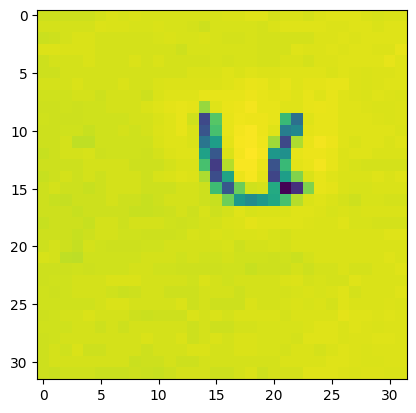

In [ ]:
plt.imshow(X_train_all[0])

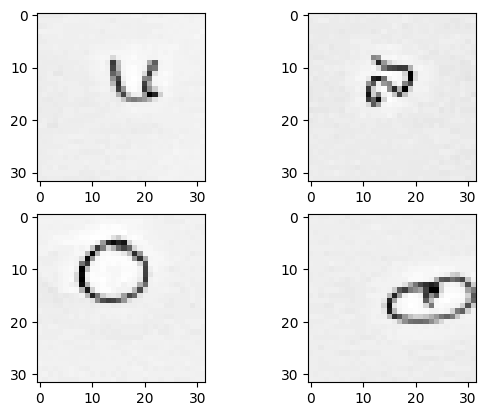

In [ ]:
plt.subplot(221)
plt.imshow(X_train_all[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train_all[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train_all[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train_all[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

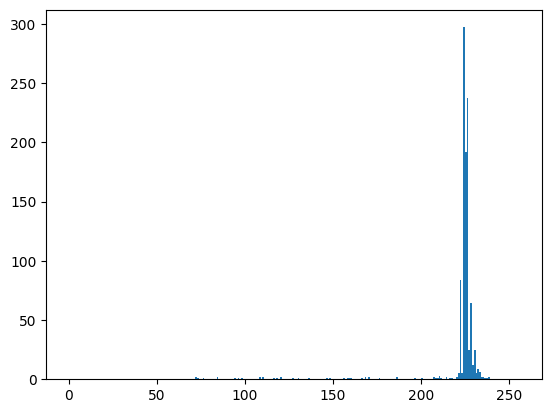

In [ ]:
imgg=X_train_all[1]
hist = cv2.calcHist([imgg],[0],None,[256],[0,256])
plt.hist(imgg.ravel(),256,[0,256])

# show the plotting graph of an image

plt.show()

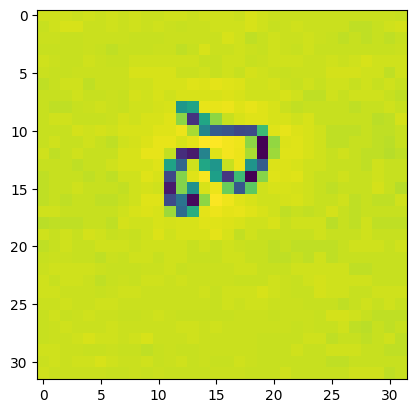

In [ ]:
plt.imshow(X_train_all[1])

In [ ]:
X_test_a=get_data(paths_test_a,resize_dim=RESIZE_DIM)
X_test_b=get_data(paths_test_b,resize_dim=RESIZE_DIM)
X_test_c=get_data(paths_test_c,resize_dim=RESIZE_DIM)
X_test_d=get_data(paths_test_d,resize_dim=RESIZE_DIM)
X_test_e=get_data(paths_test_e,resize_dim=RESIZE_DIM)
X_test_f=get_data(paths_test_f,resize_dim=RESIZE_DIM)
X_test_auga=get_data(paths_test_auga,resize_dim=RESIZE_DIM)
X_test_augc=get_data(paths_test_augc,resize_dim=RESIZE_DIM)

processed 3489/3489
processed 69/69
processed 4381/4381
processed 1948/1948
processed 2970/2970
processed 495/495
processed 2168/2168
processed 2106/2106


In [ ]:
X_test_all=np.concatenate((X_test_a,X_test_b,X_test_c,X_test_d,X_test_e,X_test_f,X_test_auga,X_test_augc))

In [ ]:
X_test_all.shape

(17626, 32, 32)

In [ ]:
X_train_all = X_train_all.reshape(X_train_all.shape[0],32, 32,1).astype('float32')/255
#X_test_all = X_test_all.reshape(X_test_all.shape[0],32, 32,1).astype('float32')/255

X_train_all.shape

(72045, 32, 32, 1)

In [ ]:
X_train_all = X_train_all/255
#X_test_all=X_test_all/255

In [ ]:
indices=list(range(len(X_train_all)))
np.random.seed(42)
np.random.shuffle(indices)

ind=int(len(indices)*0.80)
# train data
X_train=X_train_all[indices[:ind]]
y_train=y_train_all[indices[:ind]]
# validation data
X_val=X_train_all[indices[-(len(indices)-ind):]]
y_val=y_train_all[indices[-(len(indices)-ind):]]

In [ ]:
X_train.shape

(57636, 32, 32, 1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        832       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_4 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)       36992     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)      

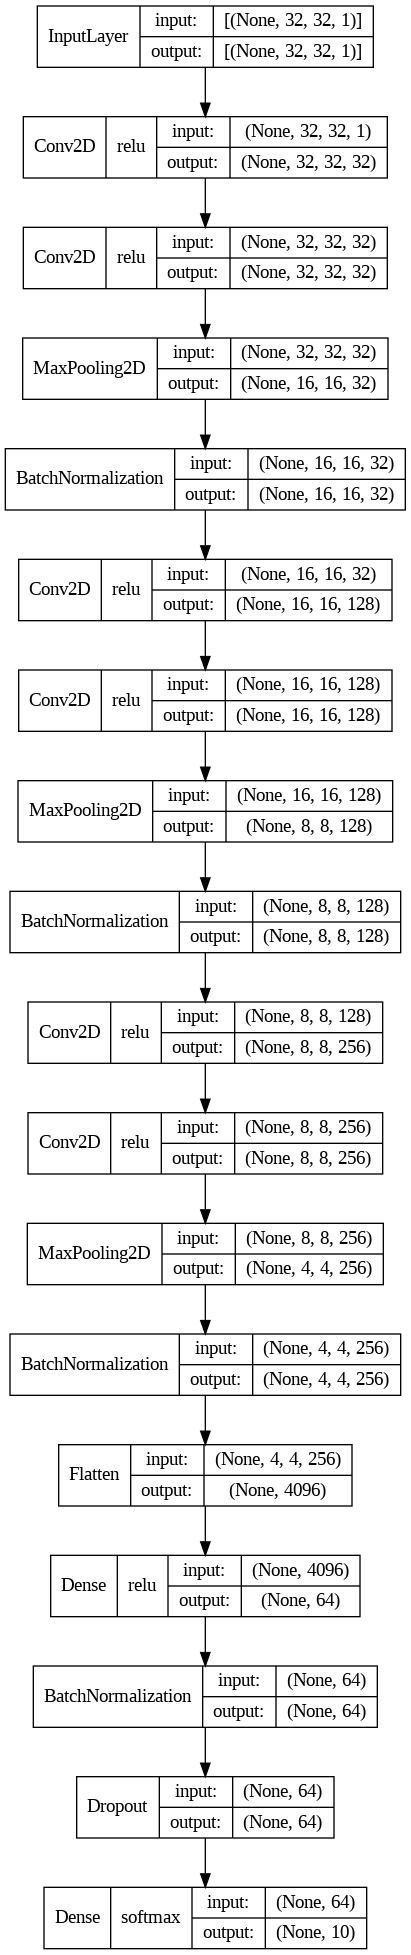

In [ ]:
def cnn_model_bangla_digit(input=(32, 32, 1), conv_units=(32, 128, 256)):
  model = tf.keras.models.Sequential()
  model.add(Conv2D(conv_units[0], kernel_size=(5, 5), input_shape=input, padding='same', activation='relu'))
  model.add(Conv2D(conv_units[0], kernel_size=(5, 5), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(BatchNormalization())

  for c in conv_units[1:]:
    model.add(Conv2D(c, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(c, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  model.add(Dense(10, activation='softmax'))
  return model

model = cnn_model_bangla_digit()
model.summary()
plot_model(model, show_shapes=True, show_layer_names=False, show_layer_activations=True)

Epoch 1/30
577/577 - 35s - loss: 0.7955 - accuracy: 0.7300 - val_loss: 5.1992 - val_accuracy: 0.3922 - 35s/epoch - 61ms/step
Epoch 2/30
577/577 - 11s - loss: 0.1408 - accuracy: 0.9580 - val_loss: 0.9132 - val_accuracy: 0.7669 - 11s/epoch - 19ms/step
Epoch 3/30
577/577 - 10s - loss: 0.0846 - accuracy: 0.9751 - val_loss: 1.6295 - val_accuracy: 0.7160 - 10s/epoch - 18ms/step
Epoch 4/30
577/577 - 10s - loss: 0.0558 - accuracy: 0.9837 - val_loss: 0.2894 - val_accuracy: 0.9057 - 10s/epoch - 18ms/step
Epoch 5/30
577/577 - 12s - loss: 0.0436 - accuracy: 0.9874 - val_loss: 0.0771 - val_accuracy: 0.9754 - 12s/epoch - 20ms/step
Epoch 6/30
577/577 - 11s - loss: 0.0313 - accuracy: 0.9907 - val_loss: 0.0984 - val_accuracy: 0.9696 - 11s/epoch - 19ms/step
Epoch 7/30
577/577 - 12s - loss: 0.0222 - accuracy: 0.9936 - val_loss: 0.1022 - val_accuracy: 0.9683 - 12s/epoch - 20ms/step
Epoch 8/30
577/577 - 12s - loss: 0.0164 - accuracy: 0.9955 - val_loss: 0.1519 - val_accuracy: 0.9504 - 12s/epoch - 20ms/step


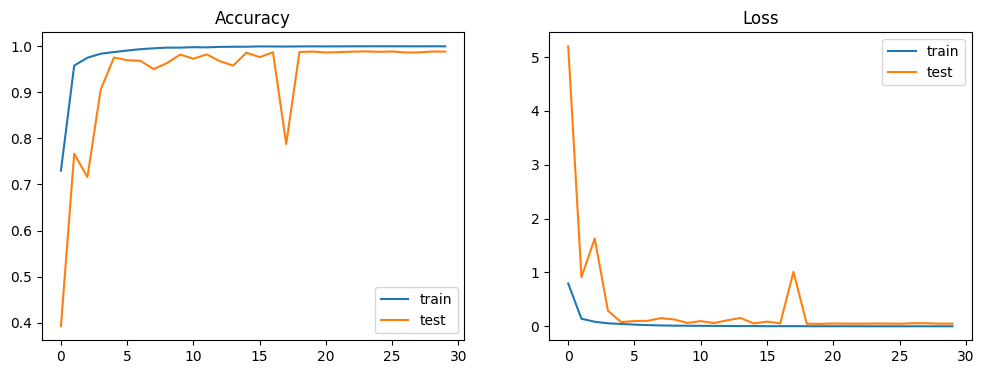

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=["accuracy"])

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=100,
    verbose=2,
    validation_data=(X_val,y_val)
)

print_best_metrics(history.history)
plot_results(history)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen2 =  ImageDataGenerator(rotation_range=20)
batch_size = 200
gen_bangla10_aug = datagen2.flow(X_train, y_train,batch_size = batch_size) # Notice that batch_size is now part of the generator


Epoch 1/30
289/289 - 30s - loss: 1.1361 - accuracy: 0.6107 - val_loss: 1.8752 - val_accuracy: 0.3902 - 30s/epoch - 105ms/step
Epoch 2/30
289/289 - 26s - loss: 0.2564 - accuracy: 0.9237 - val_loss: 4.2364 - val_accuracy: 0.4301 - 26s/epoch - 91ms/step
Epoch 3/30
289/289 - 27s - loss: 0.1647 - accuracy: 0.9511 - val_loss: 1.2302 - val_accuracy: 0.7536 - 27s/epoch - 94ms/step
Epoch 4/30
289/289 - 31s - loss: 0.1219 - accuracy: 0.9630 - val_loss: 0.2385 - val_accuracy: 0.9249 - 31s/epoch - 108ms/step
Epoch 5/30
289/289 - 31s - loss: 0.1009 - accuracy: 0.9700 - val_loss: 0.1311 - val_accuracy: 0.9575 - 31s/epoch - 107ms/step
Epoch 6/30
289/289 - 27s - loss: 0.0916 - accuracy: 0.9721 - val_loss: 0.1501 - val_accuracy: 0.9534 - 27s/epoch - 94ms/step
Epoch 7/30
289/289 - 27s - loss: 0.0808 - accuracy: 0.9745 - val_loss: 0.2525 - val_accuracy: 0.9144 - 27s/epoch - 94ms/step
Epoch 8/30
289/289 - 30s - loss: 0.0726 - accuracy: 0.9786 - val_loss: 0.0689 - val_accuracy: 0.9799 - 30s/epoch - 104ms/s

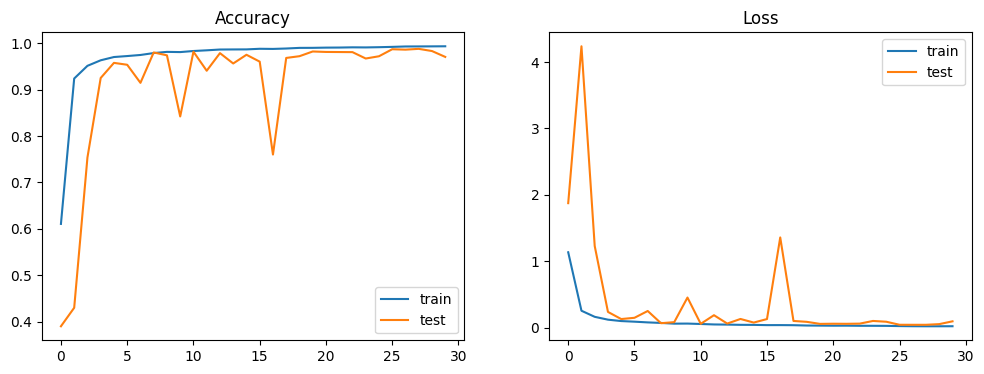

In [ ]:
model = cnn_model_bangla_digit()

opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=["accuracy"])

history = model.fit(
    gen_bangla10_aug,
    epochs=30,
    batch_size=batch_size,
    verbose=2,
    validation_data=(X_val,y_val)
)

print_best_metrics(history.history)
plot_results(history)

Epoch 1/50
288/288 - 26s - loss: 0.5647 - accuracy: 0.8146 - val_loss: 1.2958 - val_accuracy: 0.4991 - lr: 0.0010 - 26s/epoch - 89ms/step
Epoch 2/50
288/288 - 18s - loss: 0.1088 - accuracy: 0.9678 - val_loss: 0.1168 - val_accuracy: 0.9656 - lr: 0.0010 - 18s/epoch - 64ms/step
Epoch 3/50
288/288 - 17s - loss: 0.0767 - accuracy: 0.9772 - val_loss: 0.1187 - val_accuracy: 0.9619 - lr: 0.0010 - 17s/epoch - 59ms/step
Epoch 4/50
288/288 - 18s - loss: 0.0594 - accuracy: 0.9825 - val_loss: 0.0596 - val_accuracy: 0.9813 - lr: 0.0010 - 18s/epoch - 62ms/step
Epoch 5/50
288/288 - 19s - loss: 0.0499 - accuracy: 0.9853 - val_loss: 0.0959 - val_accuracy: 0.9697 - lr: 0.0010 - 19s/epoch - 65ms/step
Epoch 6/50

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
288/288 - 17s - loss: 0.0423 - accuracy: 0.9875 - val_loss: 0.0935 - val_accuracy: 0.9724 - lr: 0.0010 - 17s/epoch - 58ms/step
Epoch 7/50
288/288 - 18s - loss: 0.0270 - accuracy: 0.9922 - val_loss: 0.0373 - val_accuracy: 0

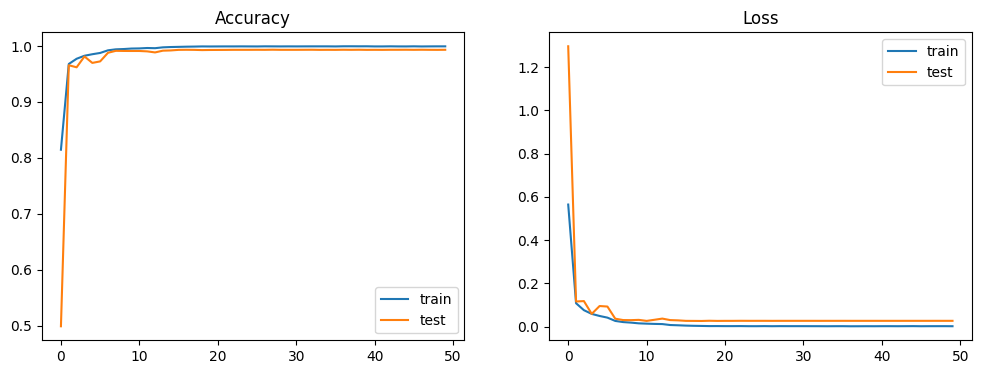

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback, LearningRateScheduler

rop = ReduceLROnPlateau(monitor='val_loss',factor=0.5, patience=2, verbose=1)

model = cnn_model_bangla_digit()

#opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', metrics=["accuracy"])

history = model.fit(
    gen_bangla10_aug,
    epochs=50,
    steps_per_epoch = X_train.shape[0]//batch_size,
    verbose=2,
    validation_data=(X_val,y_val),
    callbacks=[rop]
)

print_best_metrics(history.history)
plot_results(history)

#**Using ResNet**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(
    include_top=False,
    weights=None,
    input_shape=(32, 32, 1),
    classes=10,
    classifier_activation="softmax",
)


preds = model.predict(X_val)

451/451 [==============================] - 13s 11ms/step


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Upsample the images to the size expected by ResNet-50
train_images = tf.image.grayscale_to_rgb(X_train)
test_images = tf.image.grayscale_to_rgb(X_val)

# Load the ResNet-50 model without the top (classification) layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pre-trained layers
for layer in resnet_base.layers:
    layer.trainable = False

model = models.Sequential()
model.add(layers.UpSampling2D(size=(7, 7)))  # Upsample to match the size expected by ResNet-50
model.add(resnet_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, y_train, epochs=5, batch_size=32, validation_data=(test_images, y_val))
print_best_metrics(history.history)
plot_results(history)

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import ResNet50

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Duplicate the single channel to create three channels
train_images = tf.image.grayscale_to_rgb(train_images)
test_images = tf.image.grayscale_to_rgb(test_images)

# Convert labels to categorical one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Resize the images to the size expected by ResNet-50
train_images = tf.image.resize(train_images, (224, 224))
test_images = tf.image.resize(test_images, (224, 224))

# Load the ResNet-50 model without the top (classification) layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pre-trained layers
for layer in resnet_base.layers:
    layer.trainable = False

# Create a model by adding custom layers on top of the ResNet-50 base
model = models.Sequential()
model.add(resnet_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(test_images, test_labels))


In [ ]:
print('ResNet Model accuracy: {:.4f}'.format(accuracy_score(np.argmax(y_val, axis=1), preds)))